#  LGM-VIP Data Science Internship
## Task 3: Exploratory Data Analysis on Dataset - Terrorism(Level-Intermediate)
## Batch: August 2022
## Author: Bhakti Pawar

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset

In [2]:
data=pd.read_csv("../input/terrorism/globalterrorismdb_0718dist.csv",encoding="latin-1")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Preview first five rows of the data
data.head()    

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# Printing all the column names of data
for i in data.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Data Cleaning

In [7]:
# Check the null values
for i in data.columns:
    print(i,":", data.isnull().sum()[i])

eventid : 0
iyear : 0
imonth : 0
iday : 0
approxdate : 172452
extended : 0
resolution : 179471
country : 0
country_txt : 0
region : 0
region_txt : 0
provstate : 421
city : 434
latitude : 4556
longitude : 4557
specificity : 6
vicinity : 0
location : 126196
summary : 66129
crit1 : 0
crit2 : 0
crit3 : 0
doubtterr : 1
alternative : 152680
alternative_txt : 152680
multiple : 1
success : 0
suicide : 0
attacktype1 : 0
attacktype1_txt : 0
attacktype2 : 175377
attacktype2_txt : 175377
attacktype3 : 181263
attacktype3_txt : 181263
targtype1 : 0
targtype1_txt : 0
targsubtype1 : 10373
targsubtype1_txt : 10373
corp1 : 42550
target1 : 636
natlty1 : 1559
natlty1_txt : 1559
targtype2 : 170547
targtype2_txt : 170547
targsubtype2 : 171006
targsubtype2_txt : 171006
corp2 : 171574
target2 : 170671
natlty2 : 170863
natlty2_txt : 170863
targtype3 : 180515
targtype3_txt : 180515
targsubtype3 : 180594
targsubtype3_txt : 180594
corp3 : 180665
target3 : 180516
natlty3 : 180544
natlty3_txt : 180544
gname : 0
gsu

In [8]:
# Choose the data you want
df=data[['iyear','imonth','iday','country_txt','provstate','location','summary',
         'success','suicide','region_txt','latitude','longitude','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill','nwound']]

In [9]:
df.head()

,iyear,imonth,iday,country_txt,provstate,location,summary,success,suicide,region_txt,latitude,longitude,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,NaN,NaN,NaN,1,0,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,Federal,NaN,NaN,1,0,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Tarlac,NaN,NaN,1,0,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Attica,NaN,NaN,1,0,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,NaN,NaN,1,0,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [10]:
df.shape

(181691, 18)

In [11]:
# Renaming the column names
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                  'provstate':'State','location':'Location','summary':'Summary','success':'Success',
                  'suicide':'Suicide','region_txt':'Region','latitude':'Latitude',
                  'longitude':'Longitude','attacktype1_txt':'Attack_type',
                   'targtype1_txt':'Target_type','gname':'Group_name','weaptype1_txt':'Weapon_type',
                   'nkill':'Killed','nwound':'Wounded'})

# Data Exploration

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Location     55495 non-null   object 
 6   Summary      115562 non-null  object 
 7   Success      181691 non-null  int64  
 8   Suicide      181691 non-null  int64  
 9   Region       181691 non-null  object 
 10  Latitude     177135 non-null  float64
 11  Longitude    177134 non-null  float64
 12  Attack_type  181691 non-null  object 
 13  Target_type  181691 non-null  object 
 14  Group_name   181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
dtypes: float64(4), int64(5),

In [13]:
df

,Year,Month,Day,Country,State,Location,Summary,Success,Suicide,Region,Latitude,Longitude,Attack_type,Target_type,Group_name,Weapon_type,Killed,Wounded
0,1970,7,2,Dominican Republic,NaN,NaN,NaN,1,0,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,Federal,NaN,NaN,1,0,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Tarlac,NaN,NaN,1,0,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Attica,NaN,NaN,1,0,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,NaN,NaN,1,0,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,0,Sub-Saharan Africa,2.359673,45.385034,Armed Assault,Military,Al-Shabaab,Firearms,1.0,2.0
181687,2017,12,31,Syria,Lattakia,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,0,Middle East & North Africa,35.407278,35.942679,Bombing/Explosion,Military,Muslim extremists,Explosives,2.0,7.0
181688,2017,12,31,Philippines,Maguindanao,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,0,Southeast Asia,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,2017,12,31,India,Manipur,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,0,0,South Asia,24.798346,93.940430,Bombing/Explosion,Government (General),Unknown,Explosives,0.0,0.0


In [14]:
# Basic statistical data
df.describe()

,Year,Month,Day,Success,Suicide,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.889598,0.036507,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.313391,0.187549,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


**Observation:**
1. The data consist of terrorist activities ranging from the year 1970-2017.
2. The no. of people attempts suicide in these years is 1,81,691.
3. Maximum 1570 people were killed and 8191 were wounded.

In [15]:
df['Attack_type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

**Observation:**  Most of the attacks have been done by bomb/explosion

In [16]:
df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

**Observation:** Most of the attacks have been done in the Iraq country.

In [17]:
# Printing all unique values of country
for i in df['Country'].unique():
    print(i,end=", ")

Dominican Republic, Mexico, Philippines, Greece, Japan, United States, Uruguay, Italy, East Germany (GDR), Ethiopia, Guatemala, Venezuela, West Germany (FRG), Switzerland, Jordan, Spain, Brazil, Egypt, Argentina, Lebanon, Ireland, Turkey, Paraguay, Iran, United Kingdom, Colombia, Bolivia, Nicaragua, Netherlands, Belgium, Canada, Australia, Pakistan, Zambia, Sweden, Costa Rica, South Yemen, Cambodia, Israel, Poland, Taiwan, Panama, Kuwait, West Bank and Gaza Strip, Austria, Czechoslovakia, India, France, South Vietnam, Brunei, Zaire, People's Republic of the Congo, Portugal, Algeria, El Salvador, Thailand, Haiti, Sudan, Morocco, Cyprus, Myanmar, Afghanistan, Peru, Chile, Honduras, Yugoslavia, Ecuador, New Zealand, Malaysia, Singapore, Botswana, Jamaica, Chad, North Yemen, Andorra, Syria, South Korea, United Arab Emirates, South Africa, Kenya, Iraq, Somalia, Tanzania, Sri Lanka, Namibia, Bahamas, Nigeria, Barbados, Trinidad and Tobago, Bangladesh, Angola, Mauritania, Saudi Arabia, Djibou

In [18]:
# Printing unique target types along with their count
df['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

In [19]:
# Printing unique weapon types along with their count
df['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [20]:
# Printing unique terrorist groups along with their count
df['Group_name'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group_name, Length: 3537, dtype: int64

In [21]:
# Priting Total no.of suicide attacks
df['Suicide'].value_counts()

0    175058
1      6633
Name: Suicide, dtype: int64

**Observation:** The no.of suicide attacks: 6633

In [22]:
df['Success'].value_counts()

1    161632
0     20059
Name: Success, dtype: int64

**Observation:** The no. of successful attacks: 161632

In [23]:
# Changing the default figure size
import matplotlib
matplotlib.rcParams['figure.figsize']=[16,6]

# Data Visualization

In [24]:
# Correlation
df.corr()    

,Year,Month,Day,Success,Suicide,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,-0.082963,0.137736,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.002845,0.003071,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,-0.011802,0.003593,0.003423,-0.002285,-0.003693,-0.001268
Success,-0.082963,-0.002845,-0.011802,1.000000,-0.031155,-0.073715,-0.000858,0.053115,0.025804
Suicide,0.137736,0.003071,0.003593,-0.031155,1.000000,0.068682,0.000486,0.136086,0.099525
Latitude,0.166933,-0.015978,0.003423,-0.073715,0.068682,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,-0.000858,0.000486,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,0.053115,0.136086,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.025804,0.099525,0.015988,0.000223,0.534375,1.000000


<AxesSubplot:>

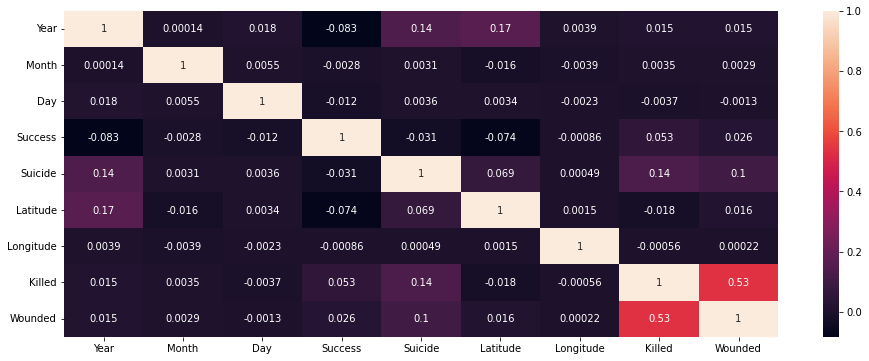

In [25]:
# Visualizing Correlation
sns.heatmap(df.corr(),annot=True)

In [26]:
sns.set_style('darkgrid')       # Applying background style to the plot

# Total no.of people killed grouped by year
y=df.groupby(['Year'])[['Killed']].sum()  
y.head()


,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No. of people killed in every year')

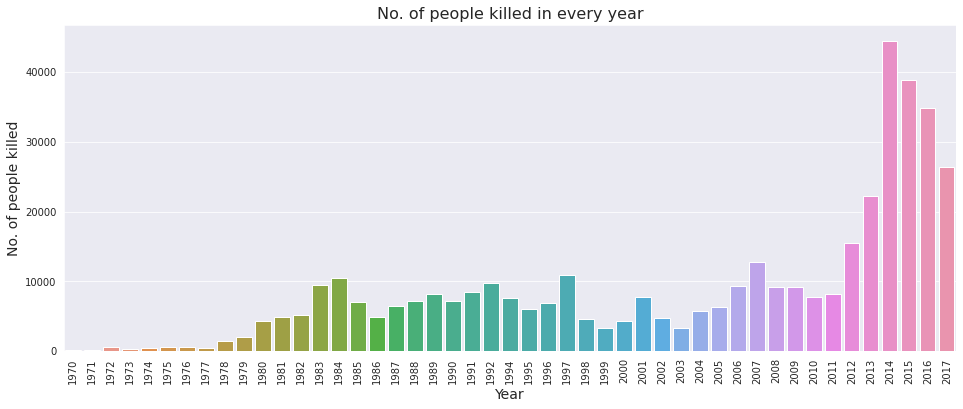

In [27]:
sns.barplot(y.index,y['Killed'])
plt.xticks(rotation=90)
plt.xlabel('Year',size=14)
plt.ylabel('No. of people killed',size=14)
plt.title('No. of people killed in every year',size=16)

**Observation:**
1. Maximum no.of people killed in the year 2014 
2. There is gradually ups and downs in the year 1978 to 2011
3. The no. of killed people increased rapidly from the year 2011
4. 40000+ people were killed in 2014

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No.of attacks in each year')

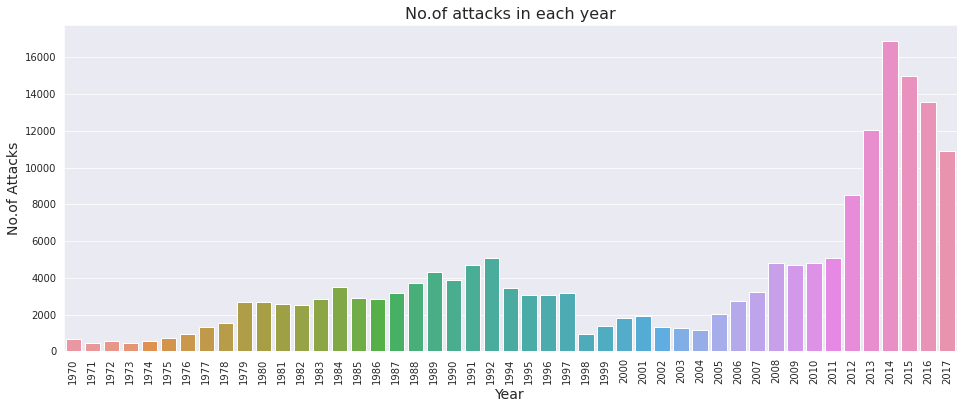

In [28]:
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.xlabel('Year',size=14)
plt.ylabel('No.of Attacks',size=14)
plt.title('No.of attacks in each year',size=16)


**Observation:**
1. There is gradually increasing trend in the no. of attacks from the year 1970 to 1992
2. Most no. of attacks observed in the year 2014

In [29]:
# Total no.of people wounded by year
wounded_df=df.groupby(['Year'])[['Wounded']].sum()
wounded_df.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No. of people wounded in every year')

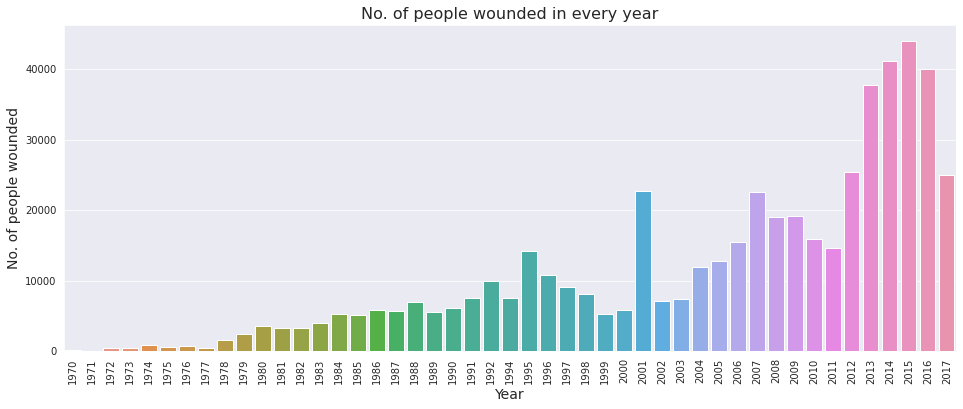

In [30]:
sns.barplot(wounded_df.index,wounded_df['Wounded'])
plt.xticks(rotation=90)
plt.xlabel('Year',size=14)
plt.ylabel('No. of people wounded',size=14)
plt.title('No. of people wounded in every year',size=16)

**Observation:**
1. Most no.of people wounded: 44043 in 2015
2. Least no.of people wounded: 82 in 1971

                               Killed
Region                               
Middle East & North Africa   137642.0
South Asia                   101319.0
Sub-Saharan Africa            78386.0
South America                 28849.0
Central America & Caribbean   28708.0
Southeast Asia                15637.0
Eastern Europe                 7415.0
Western Europe                 6694.0
North America                  4916.0
East Asia                      1152.0
Central Asia                   1000.0
Australasia & Oceania           150.0


Text(0.5, 1.0, 'No.of people killed in each region')

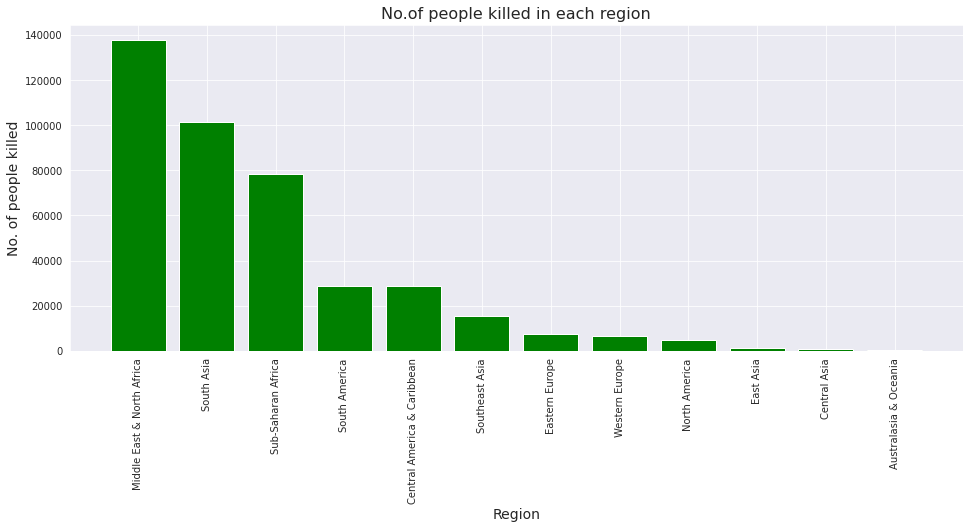

In [31]:
# Total no. of killed people grouped by region
r=df.groupby(['Region'])[['Killed']].sum().sort_values(by='Killed',ascending=False)
print(r)
plt.bar(r.index,r['Killed'],color='green')
plt.xticks(rotation=90)
plt.xlabel('Region',size=14)
plt.ylabel('No. of people killed',size=14)
plt.title('No.of people killed in each region',size=16)

**Observation:**
1. Most no.of people killed: 137642 in Middle East & North Africa  
2. Least no.of people killed: 1000 in Central Asia                  

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No.of attacks in each Region')

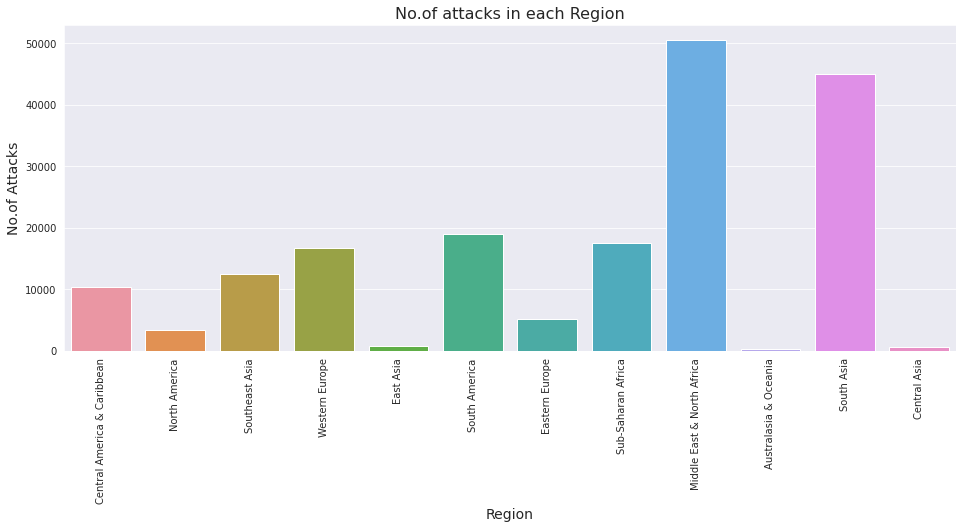

In [32]:
sns.countplot(df['Region'])
plt.xticks(rotation=90)
plt.xlabel('Region',size=14)
plt.ylabel('No.of Attacks',size=14)
plt.title('No.of attacks in each Region',size=16)

**Observation:**
1. Most no.of attacks observed in the Middle East and North Africa
2. Least no.of attacks observed in Australasia and Oceania region

In [33]:
region_with_year=pd.crosstab(df['Year'],df['Region'])
region_with_year.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


Text(0.5, 1.0, 'Regionwise no.of Attacks in each year')

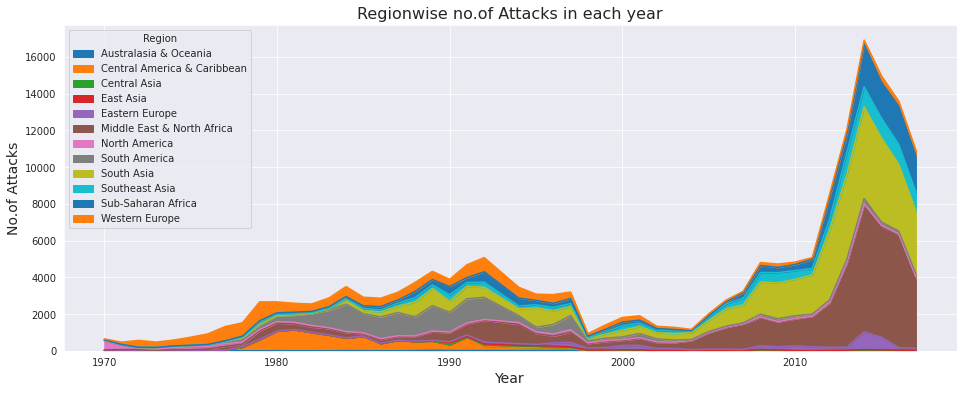

In [34]:
region_with_year.plot(kind='area')
plt.xlabel('Year',size=14)
plt.ylabel('No.of Attacks',size=14)
plt.title('Regionwise no.of Attacks in each year',size=16)

                              Wounded
Region                               
Middle East & North Africa   214308.0
South Asia                   141360.0
Sub-Saharan Africa            52857.0
Southeast Asia                26259.0
North America                 21531.0
Western Europe                18332.0
South America                 16704.0
Eastern Europe                12045.0
East Asia                      9213.0
Central America & Caribbean    8991.0
Central Asia                   2009.0
Australasia & Oceania           260.0


Text(0.5, 1.0, 'No.of people wounded in each region')

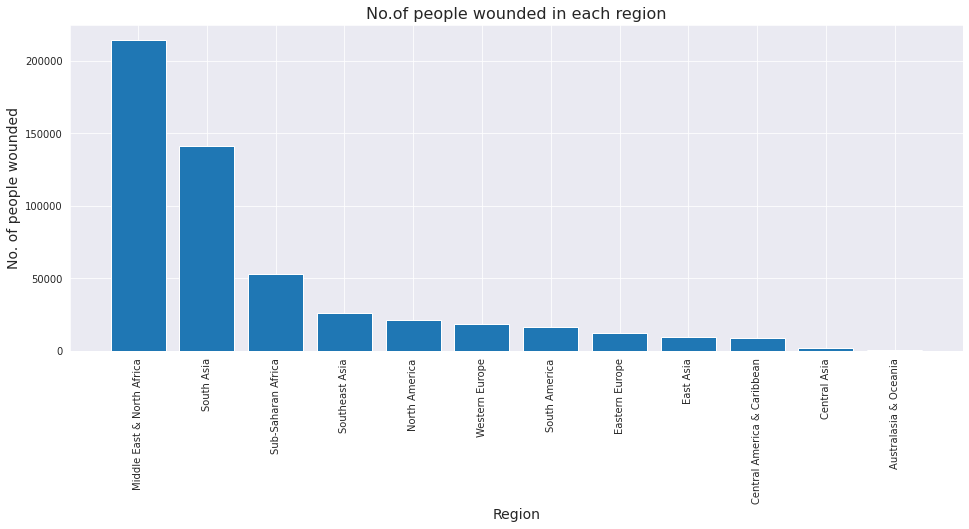

In [35]:
# Total no.of people wounded grouped by region
wound_region=df.groupby(['Region'])[['Wounded']].sum().sort_values(by='Wounded',ascending=False)
print(wound_region)
plt.bar(wound_region.index,wound_region['Wounded'])
plt.xticks(rotation=90)
plt.xlabel('Region',size=14)
plt.ylabel('No. of people wounded',size=14)
plt.title('No.of people wounded in each region',size=16)

**Observation:**
1. Most no.of people wounded: 214308 in Middle East and North Africa
2. Least no.of peole wounded: 260 in Australasia and Oceania

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


Text(0.5, 1.0, 'Top 10 countries affected by attack')

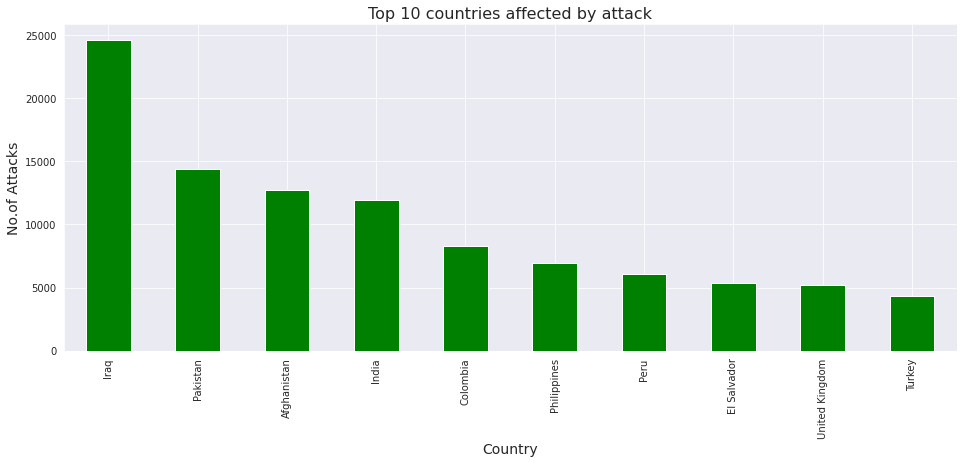

In [36]:
country=df['Country'].value_counts().head(10).sort_values(ascending=False)
print(country)
country.plot(kind='bar',color='green')
plt.xlabel('Country',size=14)
plt.ylabel('No.of Attacks',size=14)
plt.title('Top 10 countries affected by attack',size=16)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No.of attacks in each State of Iraq country')

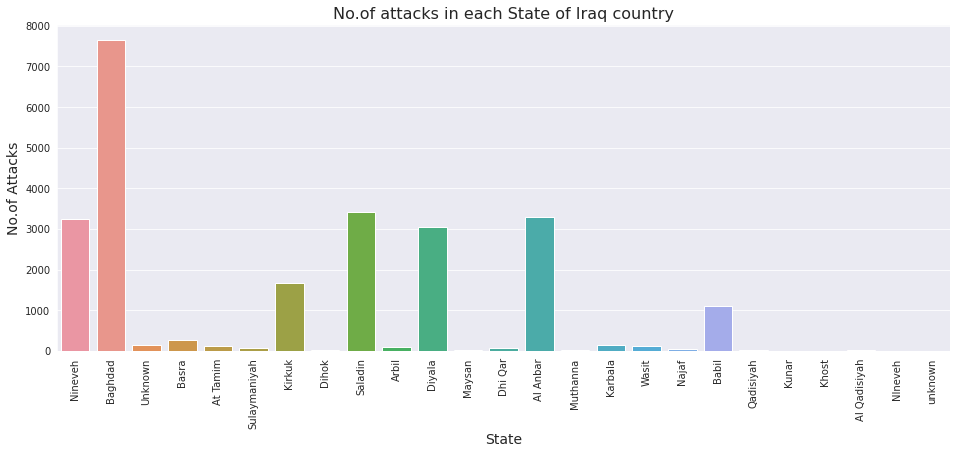

In [37]:
# As we observed that,most of the attacks have been done in the Iraq country.
# So let us analyze attacks in the states of Iraq
country_df=df[df['Country']=='Iraq']
sns.countplot(country_df['State'])
plt.xticks(rotation=90)
plt.xlabel('State',size=14)
plt.ylabel('No.of Attacks',size=14)
plt.title('No.of attacks in each State of Iraq country',size=16)

**Observation:** Most no.of attacks were in the Baghdad state of Iraq country. Baghdad state has became the main target for attacks in the Iraq.

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


Text(0.5, 1.0, 'Top 10 States affected by attack')

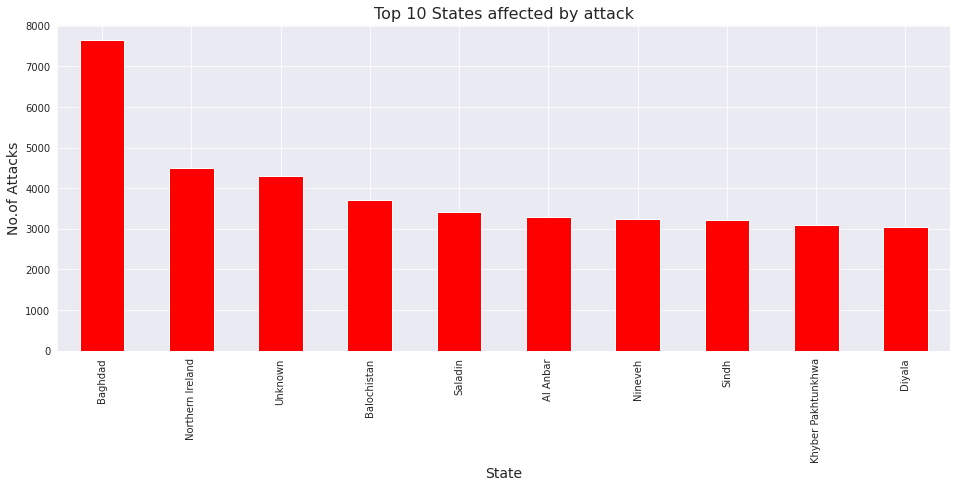

In [38]:
state=df['State'].value_counts().head(10).sort_values(ascending=False)
print(state)
state.plot(kind='bar',color='red')
plt.xlabel('State',size=14)
plt.ylabel('No.of Attacks',size=14)
plt.title('Top 10 States affected by attack',size=16)

**Observation:** Most no.of attacks: 7645 in Baghdad state


In [39]:
success_df=pd.crosstab(df['Year'],df['Success'])
success_df.head()

Success,0,1
Year,,
1970,102,549
1971,51,420
1972,116,452
1973,40,433
1974,36,545


Text(0.5, 1.0, 'Trend of successful attacks in each year')

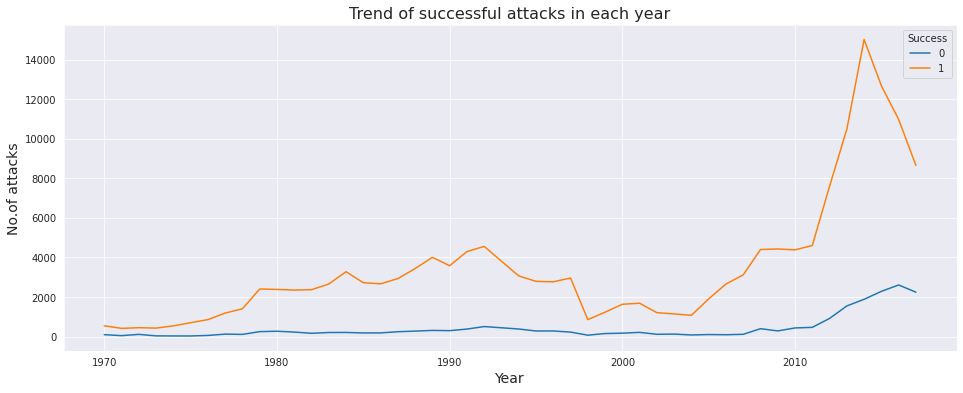

In [40]:
success_df.plot(kind='line')
plt.xlabel('Year',size=14)
plt.ylabel('No.of attacks',size=14)
plt.title('Trend of successful attacks in each year',size=16)

In [41]:
suicide_df=pd.crosstab(df['Year'],df['Suicide'])
suicide_df.head()

Suicide,0,1
Year,,
1970,651,0
1971,471,0
1972,568,0
1973,473,0
1974,581,0


Text(0.5, 1.0, 'Trend of Suicide attacks in each year')

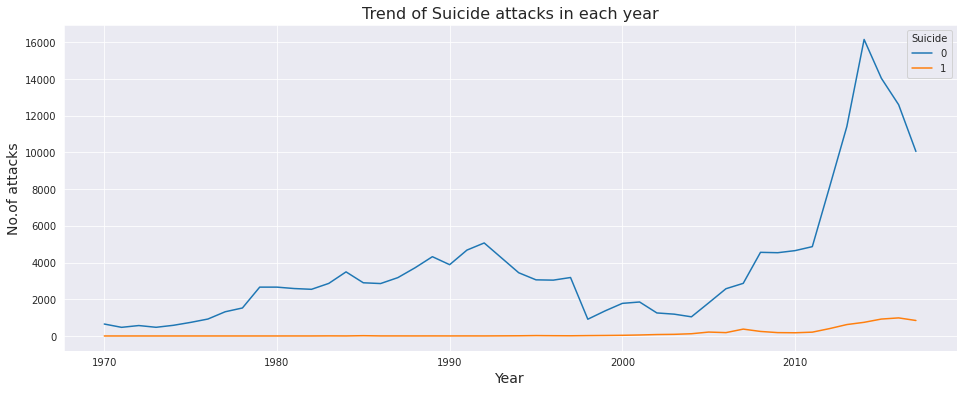

In [42]:
suicide_df.plot(kind='line')
plt.xlabel('Year',size=14)
plt.ylabel('No.of attacks',size=14)
plt.title('Trend of Suicide attacks in each year',size=16)

<AxesSubplot:ylabel='Attack_type'>

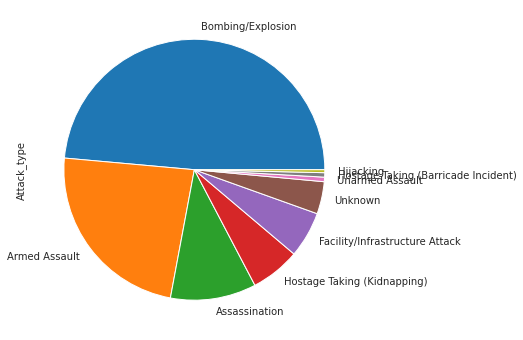

In [43]:
attack_df=df['Attack_type'].value_counts()
attack_df.plot(kind='pie')

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group_name, dtype: int64


Text(0.5, 1.0, 'Top 10 Terrorist Groups')

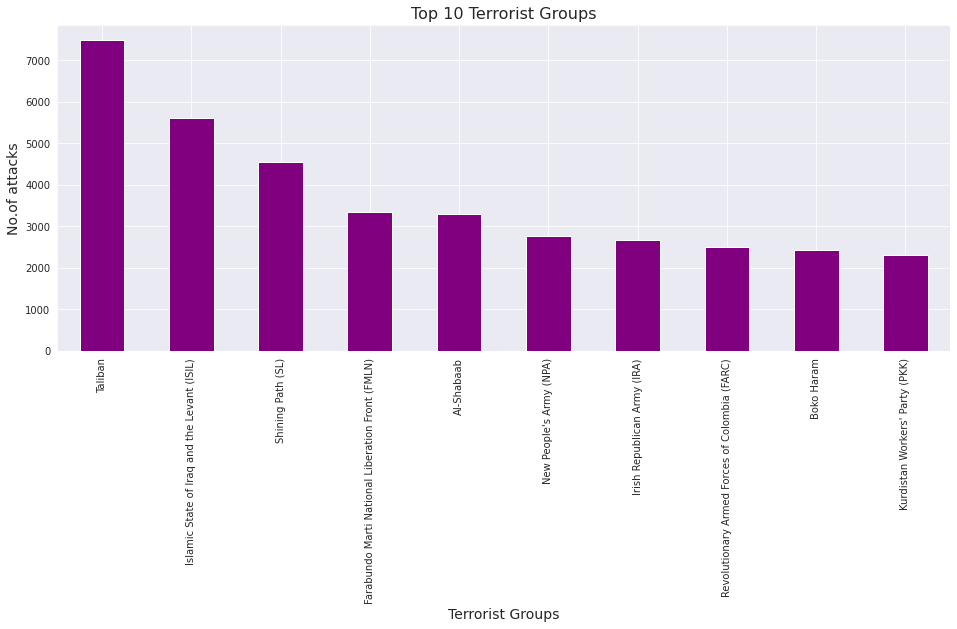

In [44]:
group_df=df['Group_name'].value_counts()[1:11].sort_values(ascending=False)
print(group_df)
group_df.plot(kind='bar',color='purple')
plt.xticks(rotation=90)
plt.xlabel('Terrorist Groups',size=14)
plt.ylabel('No.of attacks',size=14)
plt.title('Top 10 Terrorist Groups',size=16)

**Observation:** Most no.of attacks done by Taliban terrorist group


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64


Text(0.5, 1.0, 'Most frequent Target types')

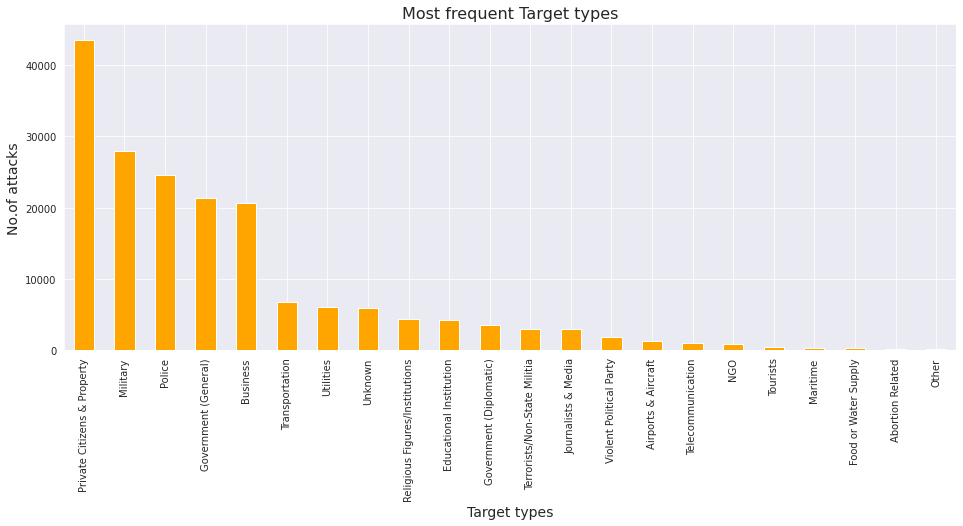

In [45]:
target_df=df['Target_type'].value_counts().sort_values(ascending=False)
print(target_df)
target_df.plot(kind='bar',color='orange')
plt.xticks(rotation=90)
plt.xlabel('Target types',size=14)
plt.ylabel('No.of attacks',size=14)
plt.title('Most frequent Target types',size=16)

**Observation:** Private citizens and Property were the main targets of terrorists